In [11]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# ----------------------------
# Load the balanced datasets
# ----------------------------
train_df = pd.read_csv("data/balanced_dataset.csv")
test_df = pd.read_csv("data/test_set.csv")

In [3]:
X_train = train_df.drop(columns=['label'])
y_train = train_df['label']
X_test = test_df.drop(columns=['label'])
y_test = test_df['label']

In [4]:
# ----------------------------
# Normalize features
# ----------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# ----------------------------
# Convert labels to categorical (for softmax output)
# ----------------------------
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [6]:
# ----------------------------
# Build MLP model
# ----------------------------
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(2, activation='softmax')
])

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
# ----------------------------
# Train the model
# ----------------------------
model.fit(X_train_scaled, y_train_cat, epochs=10, batch_size=64, validation_data=(X_test_scaled, y_test_cat))

Epoch 1/10
783/783 [==============================] - 15s 11ms/step - loss: 0.4116 - accuracy: 0.8157 - val_loss: 0.5122 - val_accuracy: 0.8135
Epoch 2/10
783/783 [==============================] - 8s 10ms/step - loss: 0.3137 - accuracy: 0.8667 - val_loss: 0.4445 - val_accuracy: 0.8267
Epoch 3/10
783/783 [==============================] - 8s 10ms/step - loss: 0.2735 - accuracy: 0.8856 - val_loss: 0.3871 - val_accuracy: 0.8285
Epoch 4/10
783/783 [==============================] - 8s 10ms/step - loss: 0.2480 - accuracy: 0.8961 - val_loss: 0.3645 - val_accuracy: 0.8301
Epoch 5/10
783/783 [==============================] - 7s 9ms/step - loss: 0.2300 - accuracy: 0.9030 - val_loss: 0.3756 - val_accuracy: 0.8335
Epoch 6/10
783/783 [==============================] - 8s 11ms/step - loss: 0.2162 - accuracy: 0.9084 - val_loss: 0.3682 - val_accuracy: 0.8331
Epoch 7/10
783/783 [==============================] - 14s 17ms/step - loss: 0.2076 - accuracy: 0.9115 - val_loss: 0.3616 - val_accuracy: 0.827

In [9]:
# ----------------------------
# Evaluate
# ----------------------------
loss, accuracy = model.evaluate(X_test_scaled, y_test_cat, verbose=0)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.8323


262/262 [==============================] - 1s 4ms/step


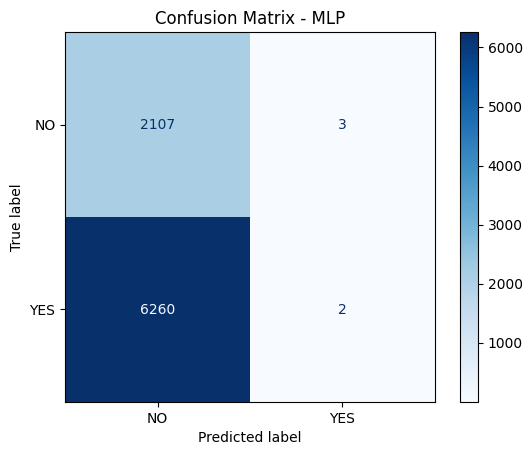

In [14]:
# ----------------------------
# Get predicted class labels for test data
# ----------------------------
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test_cat, axis=1)

cm = confusion_matrix(y_true_classes, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["NO", "YES"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - MLP")
plt.show()